# 1: Load Data


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')

# 2: Analyze and Describe the Data

In [ ]:
# Preview the dataset columns
print(df.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

# 3: Column Removal/Revision + Handle Missing Values (Before Feature Extraction)

In [ ]:
# Remove redundant features
df = df.drop(['PoolQC', 'Id'], axis=1)

In [ ]:
# Find columns with missing values and count them
missing_values = df.isnull().sum()

# Filter and show only columns with missing values
missing_columns = missing_values[missing_values > 0]
missing_columns

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [ ]:
# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical features
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Categorical Features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',

In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer for categorical features to fill with 'missing'
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')

# Fit the imputer and transform the data
df[categorical_features] = cat_imputer.fit_transform(df[categorical_features])

In [ ]:
# Create an imputer for numerical features to fill with the median
num_imputer = SimpleImputer(strategy='median')

# Fit the imputer and transform the data
df[numerical_features] = num_imputer.fit_transform(df[numerical_features])

# 4: Choosing Catgorical Data

Create Box Plot for each catorical feature. Export as .pdf and have Chat analyze.



**Summary (From Chat)**

**Top 5 Categorical Features:**

**Neighborhood:** This feature shows very clear distinctions in house prices between categories. Certain neighborhoods (like NridgHt, NoRidge, and StoneBr) have significantly higher prices, making this a highly predictive feature.

**ExterQual:** The quality of exterior material (Ex, Gd, TA, etc.) shows strong differences in house prices. Higher exterior quality corresponds to much higher house prices, which makes this a key feature.

**KitchenQual:** Kitchen quality is another powerful predictor of house prices, with clear and consistent distinctions between categories. Better kitchen quality leads to significantly higher prices.

**BldgType:** The building type shows clear price distinctions, with 1Fam (single-family homes) having significantly higher prices. This feature captures the structure type of the house well.

**MSZoning:** The zoning classification (RL, FV, etc.) shows substantial differences in house prices, particularly with RL having the highest prices. It’s a strong feature to capture zoning-related influences on price.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_cat_feature(df, feature):
    """
    Visualize the relationship between `SalePrice` and a categorical feature using box plots.
    """
    plt.figure(figsize=(10, 6))

    # Sort categories by median SalePrice for better visualization
    feat_order = df.groupby(feature)['SalePrice'].median().sort_values(ascending=False).index

    # Create the box plot
    sns.boxplot(x=feature, y='SalePrice', data=df, order=feat_order, palette='GnBu_r')
    plt.xticks(rotation=45)
    plt.title(f'House Price by {feature}')
    plt.show()

In [ ]:
# List of categorical columns
categorical_cols = categorical_features

# Plot box plots for each categorical feature
  for col in categorical_cols:
      visualize_cat_feature(df, col)

IndentationError: unexpected indent (<ipython-input-2-57d1269bc015>, line 5)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

def visualize_cat_feature(df, feature, pdf):
    """
    Visualize the relationship between `SalePrice` and a categorical feature using box plots.
    Export each plot to a PDF file.
    """
    plt.figure(figsize=(10, 6))

    # Sort categories by median SalePrice for better visualization
    feat_order = df.groupby(feature)['SalePrice'].median().sort_values(ascending=False).index

    # Create the box plot
    sns.boxplot(x=feature, y='SalePrice', data=df, order=feat_order, palette='GnBu_r')
    plt.xticks(rotation=45)
    plt.title(f'House Price by {feature}')

    # Save each figure to the PDF file
    pdf.savefig()
    plt.close()

# Create a list of categorical columns
categorical_cols = categorical_features

# Create a PDF to save the charts
with PdfPages('box_charts.pdf') as pdf:
    for col in categorical_cols:
        visualize_cat_feature(df, col, pdf)

print("Box plots have been saved to box_charts.pdf.")

# 5: Choosing Numerical Data Using Pearson Correlation

**Summary (From Chat)**

**Top 4 Numerical Features:**

**OverallQual:** This feature has the highest correlation with SalePrice (0.79). It measures the overall material and finish quality of the house, making it a critical predictor. Homes with higher quality materials and finishes are generally priced significantly higher, making this feature essential for the model.

**GrLivArea:** The second most correlated feature (0.71), GrLivArea represents the above-ground living area (square footage). Larger homes tend to sell for more, and this feature captures that relationship, making it highly predictive of house prices.

**GarageCars:** This feature measures the number of cars the garage can accommodate and has a strong correlation with SalePrice (0.64). Houses with more garage space tend to be more expensive, reflecting the size and luxury of the property.

**TotalBsmtSF:** This feature represents the total square footage of the basement and has a correlation of 0.61 with SalePrice. Larger basements add significant value to the home, contributing to higher sale prices.

Top 5 numerical features most correlated with SalePrice:
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64


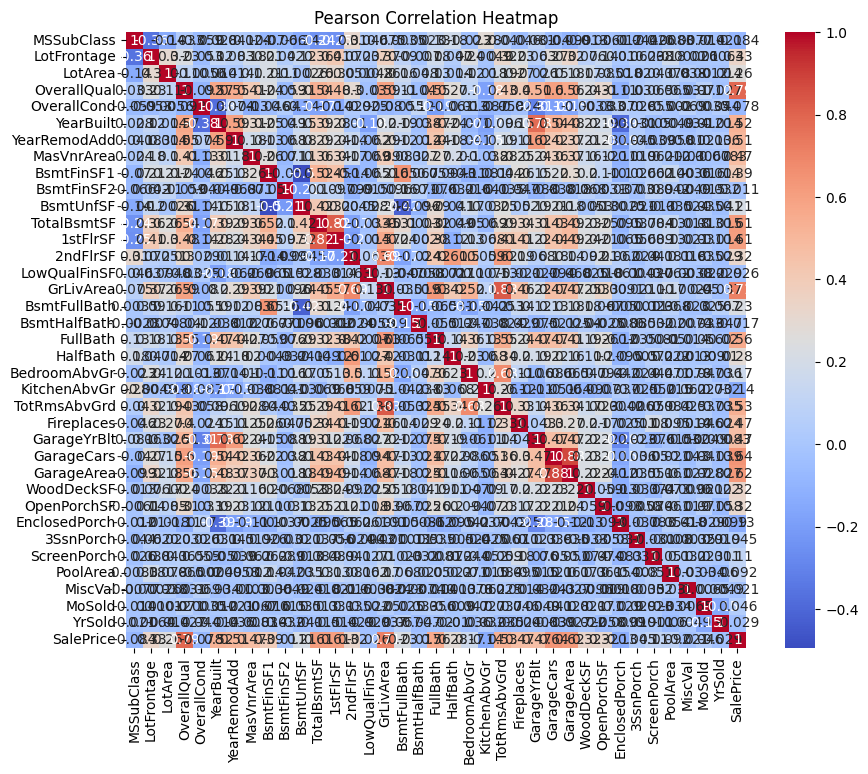

In [ ]:
# Select numerical columns (excluding the categorical features already chosen)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Extract correlations with SalePrice
corr_with_target = corr_matrix['SalePrice'].abs().sort_values(ascending=False)

# Print the top 5 numerical features most correlated with SalePrice
top_5_numerical_features = corr_with_target.drop('SalePrice').head(5)
print("Top 5 numerical features most correlated with SalePrice:")
print(top_5_numerical_features)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.show()

# 6: Final Processing

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the final features (4 numerical, 5 categorical)
final_numerical_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
final_categorical_features = ['Neighborhood', 'ExterQual', 'KitchenQual', 'BldgType', 'MSZoning']

# Create a new DataFrame with the selected features
final_df = df[final_numerical_features + final_categorical_features]

# Step 1: One-hot encode categorical features
final_df_encoded = pd.get_dummies(final_df, columns=final_categorical_features, drop_first=True)

# Step 2: Separate the target variable (SalePrice)
target_variable_df = df['SalePrice']  # This is the target

# Step 3: Standardize numerical features (after one-hot encoding)
scaler = StandardScaler()
final_df_encoded[final_numerical_features] = scaler.fit_transform(final_df_encoded[final_numerical_features])

# Convert boolean columns to integers (True -> 1, False -> 0)
final_df_encoded = final_df_encoded.astype({col: 'int32' for col in final_df_encoded.select_dtypes('bool').columns})

# X is now the preprocessed features, y is the target (SalePrice)
X = final_df_encoded
y = target_variable_df

# Check the preprocessed data
display(X.head(100))
display(y.head())

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,KitchenQual_Gd,KitchenQual_TA,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0.651479,0.370333,0.311725,-0.459303,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,-0.071836,-0.482512,0.311725,0.466465,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0.651479,0.515013,0.311725,-0.313369,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3,0.651479,0.383659,1.650307,-0.687324,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,1.374795,1.299326,1.650307,0.199680,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.071836,-0.086548,0.311725,-0.860620,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
96,0.651479,0.138085,0.311725,1.209815,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
97,-1.518467,-1.057421,-1.026858,-0.222160,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
98,-0.795151,-1.295380,-1.026858,-1.366828,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0


# 7: Model Creation


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np

# Step 1: Apply np.log to the target variable (SalePrice)
y_log_transformed = np.log(y.values)  # log(y) transformation

# Step 2: Convert the features and transformed target to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y_log_transformed, dtype=torch.float32).view(-1, 1)  # Reshape target

# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Step 4: Create a DataLoader for mini-batch gradient descent
batch_size = 64
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Validation loader
val_dataset = TensorDataset(X_test, y_test)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Step 5: Define the neural network architecture
class HousePriceNN(nn.Module):
    def __init__(self, input_size):
        super(HousePriceNN, self).__init__()
        self.linear1 = nn.Linear(input_size, 512)  # Adjust input_size dynamically
        self.linear2 = nn.Linear(512, 256)
        self.linear3 = nn.Linear(256, 128)
        self.linear4 = nn.Linear(128, 64)
        self.linear5 = nn.Linear(64, 16)
        self.linear6 = nn.Linear(16, 1)

    def activation(self, x):
        return torch.relu(x)

    def forward(self, x):
        x = x.type(torch.float32)
        x = self.activation(self.linear1(x))
        x = self.activation(self.linear2(x))
        x = self.activation(self.linear3(x))
        x = self.activation(self.linear4(x))
        x = self.activation(self.linear5(x))
        x = self.linear6(x)
        return x

# Step 6: Initialize the model
input_size = X_train.shape[1]  # Dynamically set input size based on the number of features
model = HousePriceNN(input_size)

# Step 7: Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 8: Training and Evaluation


Epoch [2/40], Loss: 12.714693, Validation Loss: 7.032202
Epoch [4/40], Loss: 1.394769, Validation Loss: 0.919825
Epoch [6/40], Loss: 0.710154, Validation Loss: 0.592730
Epoch [8/40], Loss: 0.514659, Validation Loss: 0.482277
Epoch [10/40], Loss: 0.352186, Validation Loss: 0.369311
Epoch [12/40], Loss: 0.264692, Validation Loss: 0.306722
Epoch [14/40], Loss: 0.194771, Validation Loss: 0.271920
Epoch [16/40], Loss: 0.147883, Validation Loss: 0.216270
Epoch [18/40], Loss: 0.120275, Validation Loss: 0.189355
Epoch [20/40], Loss: 0.099368, Validation Loss: 0.177160
Epoch [22/40], Loss: 0.088724, Validation Loss: 0.155758
Epoch [24/40], Loss: 0.072397, Validation Loss: 0.143523
Epoch [26/40], Loss: 0.066957, Validation Loss: 0.135845
Epoch [28/40], Loss: 0.056705, Validation Loss: 0.133348
Epoch [30/40], Loss: 0.047721, Validation Loss: 0.115045
Epoch [32/40], Loss: 0.045739, Validation Loss: 0.109074
Epoch [34/40], Loss: 0.039038, Validation Loss: 0.099633
Epoch [36/40], Loss: 0.036888, Val

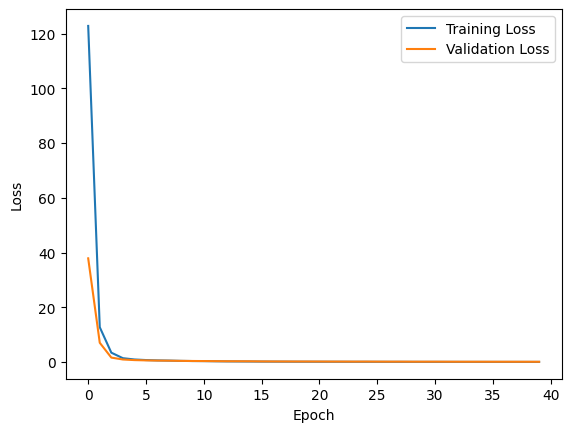

In [ ]:
# Step 8: Training loop (example with one epoch, you can expand this)
num_epochs = 40
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    total_train_loss = 0.0  # Initialize training loss

    # Training loop over mini-batches
    for data, sales in train_loader:
        sales = sales.type(torch.float32)
        optimizer.zero_grad()  # Zero the gradients
        pred = model(data)  # Forward pass
        loss = criterion(pred, sales)  # Calculate loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        total_train_loss += loss.item()  # Accumulate training loss

    # Calculate average training loss for this epoch
    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation step (no gradients needed)
    model.eval()  # Set model to evaluation mode
    total_val_loss = 0.0
    with torch.no_grad():
        for data, sales in val_loader:
            sales = sales.type(torch.float32)
            val_pred = model(data)  # Forward pass on validation data
            val_loss = criterion(val_pred, sales)  # Calculate validation loss
            total_val_loss += val_loss.item()  # Accumulate validation loss

    # Calculate average validation loss for the epoch
    avg_val_loss = total_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # Print loss every 2 epochs
    if (epoch + 1) % 2 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_train_loss:.6f}, Validation Loss: {avg_val_loss:.6f}')

# Plot the loss over epochs
import matplotlib.pyplot as plt
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


# Import Processed Test Set


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PPTest.csv to PPTest.csv


In [ ]:
test = pd.read_csv('PPTest.csv')

# Step 2: Detach and save the 'Id' column for later submission
test_ids = test['Id']
test = test.drop('Id', axis=1)

# Step 3: Convert the remaining DataFrame to a tensor
X_test_tensor = torch.tensor(test.values, dtype=torch.float32)

# Make Predictions on the Test Set

In [ ]:
model.eval()

# Make predictions on the test set
with torch.no_grad():
    test_predictions_log = model(X_test_tensor)

# Reverse the log-transform to get the original scale of the prices
test_predictions = np.exp(test_predictions_log.numpy())

# Create the Submission CSV

In [ ]:
print(f"Length of test_ids: {len(test_ids)}")
print(f"Length of test_predictions: {len(test_predictions)}")


Length of test_ids: 1459
Length of test_predictions: 1459


In [ ]:
submission_df = pd.DataFrame({
    'Id': test_ids,  # Use the Id column extracted earlier
    'SalePrice': test_predictions.flatten()  # Flatten the predictions to a 1D array
})

# Step 4: Save the predictions to a CSV file
submission_df.to_csv('submission2.csv', index=False)

print("Submission file 'submission2.csv' created successfully.")

Submission file 'submission2.csv' created successfully.
